<a href="https://colab.research.google.com/github/snehasrini99/Network_attack_classification/blob/main/ML_modeling_UNSW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Modeling_UNSW
running different ML algorithms with UNSW dataset to sort which ML algorithm works best with Network dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay #changed From sklearn 1.2
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/24Spring/NSP/Project

/content/drive/MyDrive/24Spring/NSP/Project


## Cleaned UNSW Data
need to run cleaned unsw dataset
(change path/name of dataset)
(change if column names are different - data encoding & splitting)

In [ ]:
Trained_Data_UNSW = pd.read_csv("/content/drive/MyDrive/24Spring/NSP/Project/Data_final/Cleaned_UNSW_Tested_Data.csv" , sep = "," , encoding = 'utf-8')
Tested_Data_UNSW = pd.read_csv("/content/drive/MyDrive/24Spring/NSP/Project/Data_final/Cleaned_UNSW_Trained_Data.csv" , sep = "," , encoding = 'utf-8')

In [ ]:
Trained_Data_UNSW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
Tested_Data_UNSW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

### Data Encoding

In [ ]:
Trained_Data_UNSW = pd.get_dummies(Trained_Data_UNSW,columns=['proto','service','state'],prefix="",prefix_sep="")
Tested_Data_UNSW = pd.get_dummies(Tested_Data_UNSW,columns=['proto','service','state'],prefix="",prefix_sep="")

In [ ]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data_UNSW["attack_cat"] = attack_LE.fit_transform(Trained_Data_UNSW["attack_cat"])
Tested_Data_UNSW["attack_cat"] = attack_LE.fit_transform(Tested_Data_UNSW["attack_cat"])

### Data Splitting

In [ ]:
X_train_UNSW = Trained_Data_UNSW.drop(['attack_cat', 'label', 'ct_dst_ltm'], axis=1)
X_test_UNSW = Tested_Data_UNSW.drop(['attack_cat', 'label', 'ct_dst_ltm'], axis=1)


Y_train_UNSW = Trained_Data_UNSW['label']
Y_test_UNSW = Tested_Data_UNSW['label']

X_train_train_UNSW,X_test_train_UNSW ,Y_train_train_UNSW,Y_test_train_UNSW = train_test_split(X_train_UNSW, Y_train_UNSW, test_size= 0.25 , random_state=42)

# Variable names
# X_train = X_train_train_KDD_a
# Y_train = Y_train_train_KDD_a

# X_test = X_test_train_KDD_a
# Y_test = Y_test_train_KDD_a

### Data Scaling

In [ ]:
Ro_scaler = RobustScaler()
X_train_train_UNSW = Ro_scaler.fit_transform(X_train_train_UNSW)
X_test_train_UNSW = Ro_scaler.transform(X_test_train_UNSW)
# X_train_test_UNSW = Ro_scaler.fit_transform(X_train_test_UNSW)
# X_test_test_UNSW= Ro_scaler.transform(X_test_test_UNSW)

In [ ]:
X_train_train_UNSW.shape, Y_train_train_UNSW.shape
X_test_train_UNSW.shape, Y_test_train_UNSW.shape
# X_train_test_UNSW.shape, Y_train_test_UNSW.shape
# X_test_test_UNSW.shape, Y_test_test_UNSW.shape

((43836, 194), (43836,))

### VIF

In [ ]:
A = sm.add_constant(X_train_UNSW.astype(float))
Est1 = sm.GLM(Y_train_UNSW, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  label   No. Observations:               175341
Model:                            GLM   Df Residuals:                   175297
Model Family:                Gaussian   Df Model:                           43
Link Function:               Identity   Scale:                        0.045974
Method:                          IRLS   Log-Likelihood:                 21221.
Date:                Tue, 07 May 2024   Deviance:                       8059.1
Time:                        19:59:16   Pearson chi2:                 8.06e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9760
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3583      0.013     27.582      0.000       0.333       0.384
id                 2.975e-06   1.89e-08    157.007      0.000    2.94e-06    3.01e-06
dur                   0.0020      0.000     17.483      0.000       0.002       0.002
spkts                -0.0004   3.73e-05    -10.333      0.000      -0.000      -0.000
dpkts                 0.0005   9.09e-05      5.464      0.000       0.000       0.001
sbytes            -3.211e-07   5.07e-08     -6.339      0.000    -4.2e-07   -2.22e-07
dbytes             -6.81e-07   6.23e-08    -10.936      0.000   -8.03e-07   -5.59e-07
rate                2.02e-08   4.86e-09      4.159      0.000    1.07e-08    2.97e-08
sttl                  0.0003   1.37e-05     21.191      0.000       0.000       0.000
dttl                  0.0025   2.19e-05    113.613      0.000       0.002       0.003
sload             -3.311e-11   4.05e-12     -8.173      0.000    -4.1e-11   -2.52e-11
dload              4.826e-10   3.04e-10      1.585      0.113   -1.14e-10    1.08e-09
sloss                 0.0016      0.000     10.715      0.000       0.001       0.002
dloss                 0.0010      0.000      3.653      0.000       0.000       0.002
sinpkt             3.462e-07   2.25e-07      1.540      0.124   -9.44e-08    7.87e-07
dinpkt             2.548e-06   1.12e-06      2.279      0.023    3.56e-07    4.74e-06
sjit              -1.699e-07   2.14e-08     -7.949      0.000   -2.12e-07   -1.28e-07
djit               1.795e-07   1.52e-07      1.178      0.239   -1.19e-07    4.78e-07
swin                  0.0008      0.000      1.859      0.063   -4.15e-05       0.002
stcpb             -5.724e-13   6.17e-13     -0.928      0.353   -1.78e-12    6.36e-13
dtcpb               1.18e-12   6.18e-13      1.909      0.056   -3.13e-14    2.39e-12
dwin                 -0.0004   5.74e-05     -6.892      0.000      -0.001      -0.000
tcprtt               -0.2385      0.008    -29.417      0.000      -0.254      -0.223
synack               -0.5692      0.019    -30.146      0.000      -0.606      -0.532
ackdat                0.3307      0.020     16.629      0.000       0.292       0.370
smean             -3.499e-05   3.39e-06    -10.310      0.000   -4.16e-05   -2.83e-05
dmean                 0.0001   3.82e-06     29.319      0.000       0.000       0.000
trans_depth           0.0015      0.001      2.123      0.034       0.000       0.003
response_body_len -1.758e-08   1.09e-08     -1.619      0.106   -3.89e-08    3.71e-09
ct_srv_src            0.0010      0.000      3.904      0.000       0.001       0.002
ct_state_ttl          0.0913      0.004     25.463      0.000       0.084       0.098
ct_src_dport_ltm      0.0011      0.000      4.843      0.000       0.001       0.002
ct_dst_sport_ltm      0.0014      0.000      5.409      0.000       0.001

### Data Modeling

In [ ]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):

    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)

    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,6)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,6)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,6)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,6)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,6)))
    print('--------------------------------------------------\n')

    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")

    # changed into RocCurveDisplay https://github.com/mrdbourke/zero-to-mastery-ml/issues/45
    # RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test);
    RocCurveDisplay.from_estimator(estimator=Model_Abb, X=X_test, y=Y_test)

    return X_test, Y_test, Pred_Value

In [ ]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_

    return (Model_Name)

#### Logistic Regression

In [ ]:
LR_UNSW = LogisticRegression()
LR_UNSW.fit(X_train_train_UNSW , Y_train_train_UNSW)

LogisticRegression()

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.855324

The Logistic Regression Model Sensitvity = 0.934974

The Logistic Regression Model Precision  = 0.863874

The Logistic Regression Model F1 Score   = 0.898019

The Logistic Regression Model Recall     = 0.934974

--------------------------------------------------



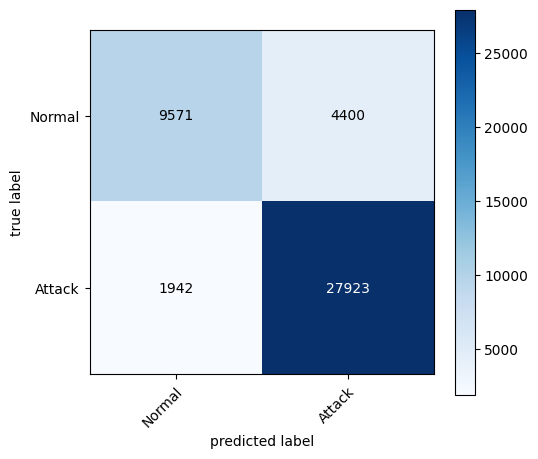

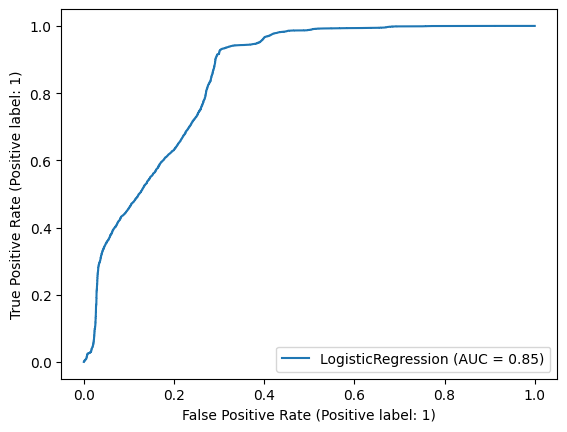

In [ ]:
X_test_UNSW_LR, Y_test_UNSW_LR, Pred_Value_UNSW_LR = Evaluate('Logistic Regression', LR_UNSW, X_test_train_UNSW, Y_test_train_UNSW)

#### Decision Tree

In [ ]:
DT_UNSW = DecisionTreeClassifier(max_features=6, max_depth=4)
DT_UNSW.fit(X_train_train_UNSW, Y_train_train_UNSW)

DecisionTreeClassifier(max_depth=4, max_features=6)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.952163

The Decision Tree Classifier Model Sensitvity = 0.993504

The Decision Tree Classifier Model Precision  = 0.939729

The Decision Tree Classifier Model F1 Score   = 0.965869

The Decision Tree Classifier Model Recall     = 0.993504

--------------------------------------------------



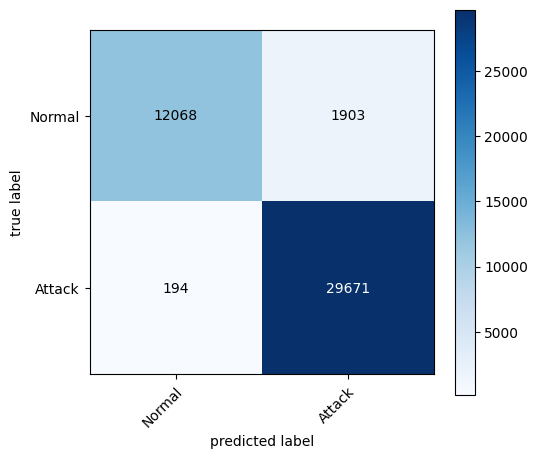

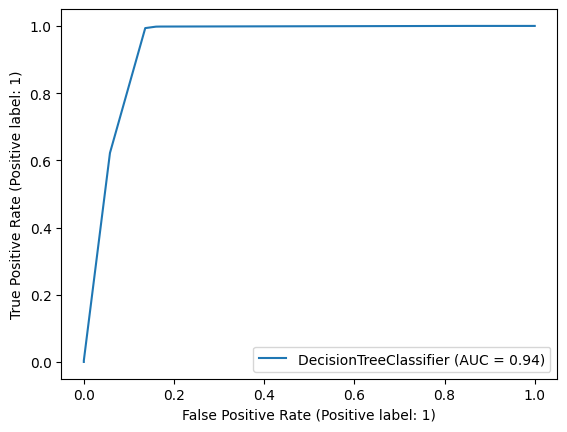

In [ ]:
X_test_UNSW_DT, Y_test_UNSW_DT, Pred_Value_UNSW_DT = Evaluate('Decision Tree Classifier', DT_UNSW, X_test_train_UNSW, Y_test_train_UNSW)

#### Random Forest

In [ ]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Parameters={ 'max_depth': max_depth}

In [ ]:
RF_UNSW = RandomForestClassifier()
GridSearch(RF_UNSW, Parameters, X_train_train_UNSW, Y_train_train_UNSW)
RF_UNSW.fit(X_train_train_UNSW, Y_train_train_UNSW)

RandomForestClassifier()

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 0.985149

The Random Forest Classifier Model Sensitvity = 0.996919

The Random Forest Classifier Model Precision  = 0.981571

The Random Forest Classifier Model F1 Score   = 0.989186

The Random Forest Classifier Model Recall     = 0.996919

--------------------------------------------------



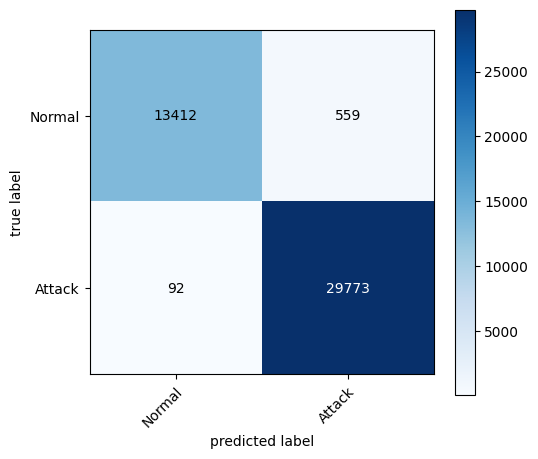

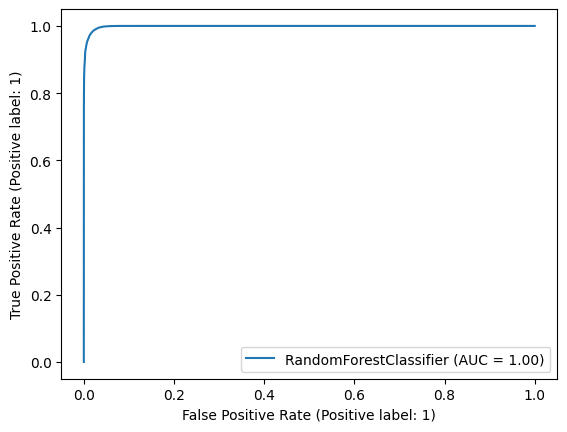

In [ ]:
X_test_UNSW_RF, Y_test_UNSW_RF, Pred_Value_UNSW_RF = Evaluate('Random Forest Classifier', RF_UNSW, X_test_train_UNSW, Y_test_train_UNSW)

#### KNN

In [ ]:
KNN_UNSW = KNeighborsClassifier(n_neighbors=6)
KNN_UNSW.fit(X_train_train_UNSW, Y_train_train_UNSW)

KNeighborsClassifier(n_neighbors=6)

--------------------------------------------------

The KNN Model Accuracy   = 0.949334

The KNN Model Sensitvity = 0.958915

The KNN Model Precision  = 0.966455

The KNN Model F1 Score   = 0.96267

The KNN Model Recall     = 0.958915

--------------------------------------------------



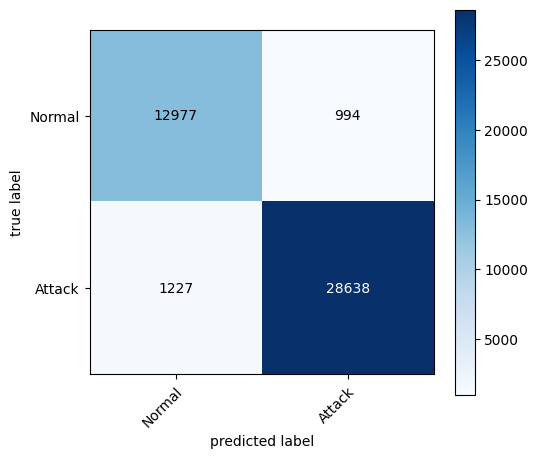

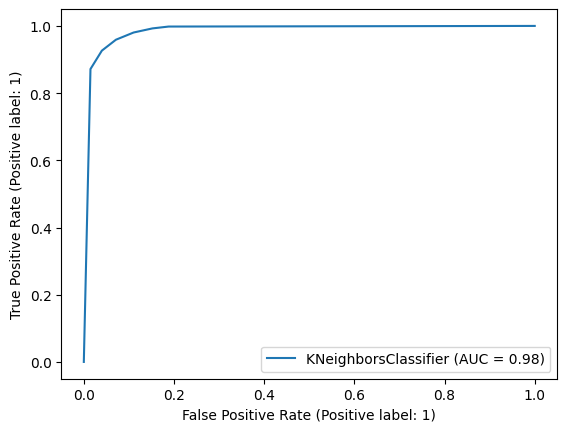

In [ ]:
X_test_UNSW_KNN, Y_test_UNSW_KNN, Pred_Value_UNSW_KNN = Evaluate('KNN', KNN_UNSW, X_test_train_UNSW, Y_test_train_UNSW)

#### SVM

In [ ]:
Linear_SVC_UNSW = svm.LinearSVC(C=1)
Linear_SVC_UNSW.fit(X_train_train_UNSW, Y_train_train_UNSW)

LinearSVC(C=1)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.952345

The SVM Linear SVC Kernel Model Sensitvity = 0.98366

The SVM Linear SVC Kernel Model Precision  = 0.948318

The SVM Linear SVC Kernel Model F1 Score   = 0.965666

The SVM Linear SVC Kernel Model Recall     = 0.98366

--------------------------------------------------



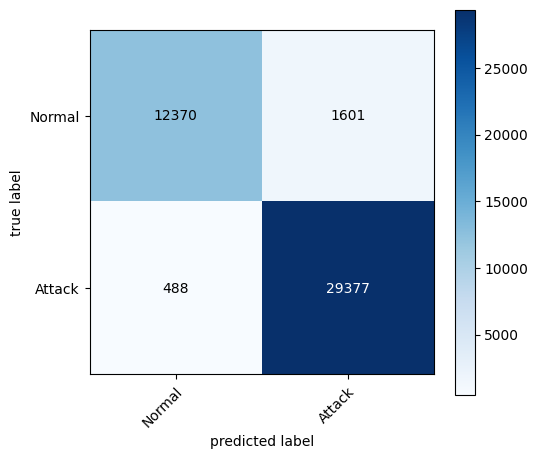

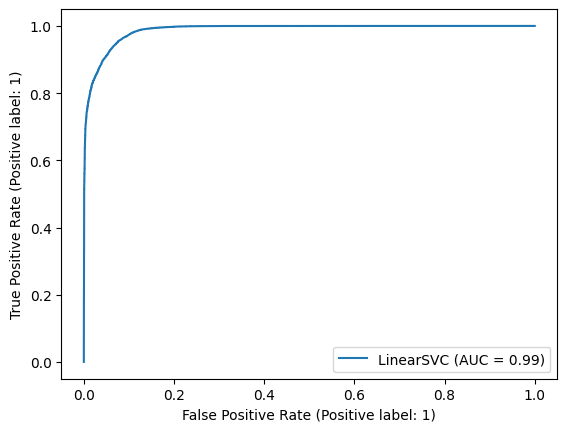

In [ ]:
X_test_UNSW_SVM, Y_test_UNSW_SVM, Pred_Value_UNSW_SVM = Evaluate('SVM Linear SVC Kernel', Linear_SVC_UNSW, X_test_train_UNSW, Y_test_train_UNSW)

# Saving results to CSV

UNSW dataset not used for further analysis

In [ ]:
# def result(X_test, Y_test, Pred_Value):
# # (122column, id as index, attack_state)

#     # df_X_test = pd.DataFrame(X_test)
#     df_Pred_Value_m = pd.Series(Pred_Value).rename('pred')
#     m_Y_test = Y_test.reset_index()
#     m_Y_test.columns = ['id', 'attack_state']

#     # result = pd.concat([df_X_test, m_Y_test, df_Pred_Value_m], axis=1)
#     result = pd.concat([m_Y_test, df_Pred_Value_m], axis=1)
#     result = result.set_index('id')

#     # count correct rows
#     matching_df = (result['attack_state'] == result['pred']).sum()
#     print(f"number of correct perdiction is: {matching_df}")
#     print(f"total number of rows are: {len(X_test)}")

#     # filter attacks
#     filtered_df = result[result['attack_state'] == 1]
#     print(f"number of rows that are attack is: {len(filtered_df)}")
#     filtered_df

#     return result, filtered_df

In [ ]:
# # Logistic Regression
# result_UNSW_lr, filtered_UNSW_lr = result(X_test_UNSW_LR, Y_test_UNSW_LR, Pred_Value_UNSW_LR)
# result_UNSW_lr.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_unsw_lr.csv',index = True)
# filtered_UNSW_lr.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_unsw_lr.csv',index = True)

In [ ]:
# # Decision Tree
# result_UNSW_dt, filtered_UNSW_dt = result(X_test_UNSW_DT, Y_test_UNSW_DT, Pred_Value_UNSW_DT)
# result_UNSW_dt.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_unsw_dt.csv',index = True)
# filtered_UNSW_dt.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_unsw_dt.csv',index = True)

In [ ]:
# # Random Forest
# result_UNSW_rf, filtered_UNSW_rf = result(X_test_UNSW_RF, Y_test_UNSW_RF, Pred_Value_UNSW_RF)
# result_UNSW_rf.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_unsw_rf.csv',index = True)
# filtered_UNSW_rf.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_unsw_rf.csv',index = True)

In [ ]:
# # KNN
# result_UNSW_knn, filtered_UNSW_knn = result(X_test_UNSW_KNN, Y_test_UNSW_KNN, Pred_Value_UNSW_KNN)
# result_UNSW_knn.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_unsw_knn.csv',index = True)
# filtered_UNSW_knn.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_unsw_knn.csv',index = True)

In [ ]:
# # SVM
# result_UNSW_svm, filtered_UNSW_svm = result(X_test_UNSW_SVM, Y_test_UNSW_SVM, Pred_Value_UNSW_SVM)
# result_UNSW_svm.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_unsw_svm.csv',index = True)
# filtered_UNSW_svm.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_unsw_svm.csv',index = True)